# IHT (Iterative Hard Thresholding)


#Algorithm
 
## A. Initialization

At first, y is set to a residual $r$, and estimated signal $z$ is zero vector.

$$
\hat{z}_0 = O \\
r_0       = y
$$

In [21]:
    # in class IHT 
    def __init__(self, A, y):

        # Initialization 
        self.z  = np.zeros(self.n, dtype=np.complex)
        self.r  = self.y
        

## B. Iteration

### 1. Find the index of a most correlated entry

$$ \hat{z}_{i} = H_k ( A^* r_{i-1} ) $$

where $H_k$ is hard thresholding operator. It preserves $k$ largest entries and makes others zero.

In [3]:
    # in class IHT
    def iterate(self):    

        p  = self.z + np.dot( np.conj(self.A.T),  self.r )
        z  = hardThresholding(p, self.k)
        
        
    def indexThresholding(z, k):

        desc_idxes  = np.argsort(np.abs(z))[::-1]   # sort indexes in descending order
        return desc_idxes[:k] 


    def hardThresholding(z, k):

        x_  = np.zeros(len(z), dtype=np.complex)
        for s in indexThresholding(z, k):
            x_[s] = z[s]
        return x_


### 2. Update residual
$$ r_i  = y - A \hat{z}_i $$

## Demo

sparsity: $k/n \approx $ 6.7%, number of measurements: $m = n \times 0.30 = 9$

### 1. prepare test signal

2-sparse test signal $x \in R^{10}$. We do not know which entries this signal has.

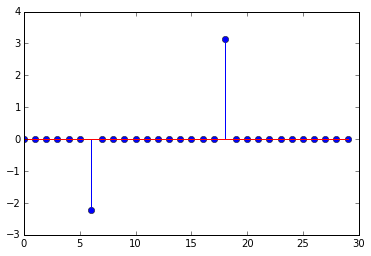

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

n         =  30
x         =  np.zeros(n)
x[n*0.2]  = -np.sqrt(5) # 1.73
x[n*0.6]  =  np.pi      # 3.14

N = np.arange(n)
plt.stem(x)
plt.show()

### 2. linear measurement

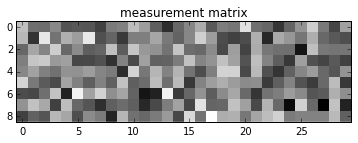

In [25]:
from CSToolbox.generator.random_matrix import gaussian

m  =  n*0.30 # number of measurement (10% of vector length)
A  =  gaussian(m,n)

plt.title('measurement matrix')
plt.imshow(A, cmap='gray', interpolation='none')
plt.show()

In [26]:
y = np.dot(A, x)
print y

[ 0.56835365 -2.67518373 -0.63569503  2.22101766  1.32688584  1.47145245
 -0.25782868  0.1039767   0.79659853]


### 3. sparse recovery

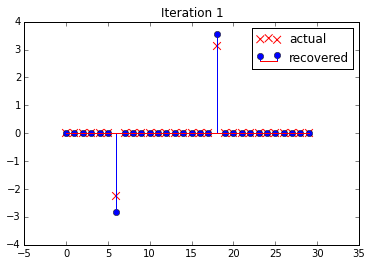

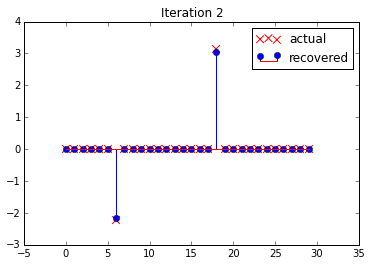

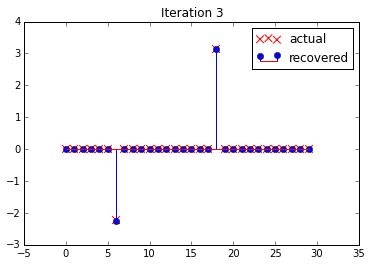

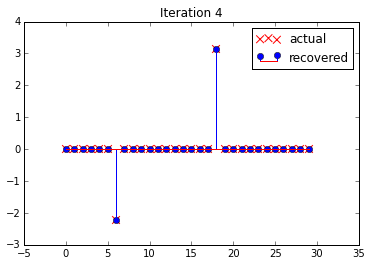

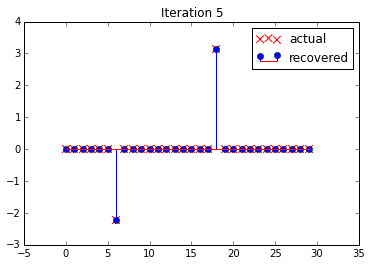

Reach to MAX Iterations
------- summary ------
[ IHT ]
number of iterations: 5
specified error:   1.00e-05
residual norm (e): 2.11e-04



In [27]:
from CSToolbox.greedy.IHT import IHT

iterator = IHT(A, y, k=2)
iterator.set_maxiterations(5)

for z in iterator:
    plt.title('Iteration %d' % iterator.iterations )
    plt.stem(z.real, label='recovered')
    plt.scatter(N, x, s=60, c='r', marker='x', label='actual')
    plt.legend()
    plt.show()